
## Part I - WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In this example, you'll be creating a Python script to visualise the weather of 500+ cities across the world of varying distance from the equator. To accomplish this, you'll be utilising a [simple Python library](https://pypi.python.org/pypi/citipy), the [OpenWeatherMap API](https://openweathermap.org/api), and a little common sense to create a representative model of weather across world cities.

Your first requirement is to create a series of scatter plots to showcase the following relationships:

* Temperature (F) vs. Latitude
* Humidity (%) vs. Latitude
* Cloudiness (%) vs. Latitude
* Wind Speed (mph) vs. Latitude

After each plot add a sentence or too explaining what the code is and analysing.

Your second requirement is to run linear regression on each relationship, only this time separating them into Northern Hemisphere (greater than or equal to 0 degrees latitude) and Southern Hemisphere (less than 0 degrees latitude):

* Northern Hemisphere - Temperature (F) vs. Latitude
* Southern Hemisphere - Temperature (F) vs. Latitude
* Northern Hemisphere - Humidity (%) vs. Latitude
* Southern Hemisphere - Humidity (%) vs. Latitude
* Northern Hemisphere - Cloudiness (%) vs. Latitude
* Southern Hemisphere - Cloudiness (%) vs. Latitude
* Northern Hemisphere - Wind Speed (mph) vs. Latitude
* Southern Hemisphere - Wind Speed (mph) vs. Latitude

After each pair of plots explain what the linear regression is modelling such as any relationships you notice and any other analysis you may have.

Your final notebook must:

* Randomly select **at least** 500 unique (non-repeat) cities based on latitude and longitude.
* Perform a weather check on each of the cities using a series of successive API calls.
* Include a print log of each city as it's being processed with the city number and city name.
* Save a CSV of all retrieved data and a PNG image for each scatter plot.

In [1]:
# Importing base libraries
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np
from scipy import stats
from datetime import date

# Importing libraries needed for API requests
import json
import requests

# Importing random library for randomizing longitudes
import random

# Importing library which returns the nearest city for given (latitude, longitude)
from citipy import citipy

# Output File (CSV)
output_data = "Data/city_weather.csv"

# API key
#from config import api_key
api_key = "30b07a8a7dcf189197c5d62313fa7b2c"

## Generate Cities List

In [28]:
# Range of latitudes and longitudes  
lat_range = (-90, 90)
lng_range = (-180, 180)

# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Randomly select at least 500 unique (non-repeat) cities based on latitude and longitude.
lats = np.random.uniform(low=-90.000, high=90.000, size=500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=500)
lat_lngs = zip(lats, lngs)


# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

278

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Pass the url and create empty lists to store the data for each field

base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{base_url}appid={api_key}&units={units}&q="

city_name_list = []
cloudiness_list = []
country_list = []
date_list = []
humidity_list = []
lat_list = []
lng_list = []
max_temp_list = []
wind_speed_list = []
index_counter = 0
set_counter = 1

test_response = requests.get(query_url + "London").json()
test_response

{'coord': {'lon': -0.1257, 'lat': 51.5085},
 'weather': [{'id': 803,
   'main': 'Clouds',
   'description': 'broken clouds',
   'icon': '04d'}],
 'base': 'stations',
 'main': {'temp': 53.2,
  'feels_like': 52.56,
  'temp_min': 50.88,
  'temp_max': 57.2,
  'pressure': 1018,
  'humidity': 92},
 'visibility': 8000,
 'wind': {'speed': 4.61, 'deg': 230},
 'clouds': {'all': 81},
 'dt': 1631772299,
 'sys': {'type': 2,
  'id': 2019646,
  'country': 'GB',
  'sunrise': 1631770630,
  'sunset': 1631816023},
 'timezone': 3600,
 'id': 2643743,
 'name': 'London',
 'cod': 200}

In [4]:
print("Beginning Data Retrieval ")
print("-----------------------------")

# For each city name in cities list, do below things...
for index, city in enumerate(cities, start = 1):
    try:
        response = requests.get(query_url + city).json()
        city_name_list.append(response["name"])
        cloudiness_list.append(response["clouds"]["all"])
        country_list.append(response["sys"]["country"])
        date_list.append(response["dt"])
        humidity_list.append(response["main"]["humidity"])
        lat_list.append(response["coord"]["lat"])
        lng_list.append(response["coord"]["lon"])
        max_temp_list.append(response['main']['temp_max'])
        wind_speed_list.append(response["wind"]["speed"])
        
        if index_counter > 49:
            index_counter = 0
            set_counter = set_counter + 1
    
        else:
            index_counter = index_counter + 1
            
        print(f"Processing Record {index_counter} of Set {set_counter} : {city}") 
  
    except(KeyError, IndexError):
        print("City not found. Skipping...")

print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

Beginning Data Retrieval 
-----------------------------
Processing Record 1 of Set 1 : dingle
Processing Record 2 of Set 1 : college
Processing Record 3 of Set 1 : jamestown
Processing Record 4 of Set 1 : boddam
Processing Record 5 of Set 1 : upernavik
Processing Record 6 of Set 1 : ancud
Processing Record 7 of Set 1 : cerrito
Processing Record 8 of Set 1 : lander
Processing Record 9 of Set 1 : majene
Processing Record 10 of Set 1 : haigerloch
Processing Record 11 of Set 1 : meulaboh
Processing Record 12 of Set 1 : iqaluit
Processing Record 13 of Set 1 : bluff
Processing Record 14 of Set 1 : rikitea
Processing Record 15 of Set 1 : ngunguru
Processing Record 16 of Set 1 : tuktoyaktuk
Processing Record 17 of Set 1 : kem
Processing Record 18 of Set 1 : garmsar
Processing Record 19 of Set 1 : la mata
Processing Record 20 of Set 1 : fortuna
Processing Record 21 of Set 1 : san patricio
Processing Record 22 of Set 1 : yining
Processing Record 23 of Set 1 : santo estevao
Processing Record 24 o

Processing Record 31 of Set 4 : avera
City not found. Skipping...
Processing Record 32 of Set 4 : acapulco
Processing Record 33 of Set 4 : pak phanang
Processing Record 34 of Set 4 : port macquarie
Processing Record 35 of Set 4 : provideniya
Processing Record 36 of Set 4 : foz
Processing Record 37 of Set 4 : cuajinicuilapa
City not found. Skipping...
Processing Record 38 of Set 4 : sangar
Processing Record 39 of Set 4 : sao joao da barra
Processing Record 40 of Set 4 : mezen
Processing Record 41 of Set 4 : sulangan
Processing Record 42 of Set 4 : thompson
Processing Record 43 of Set 4 : kavieng
Processing Record 44 of Set 4 : atar
Processing Record 45 of Set 4 : longyearbyen
Processing Record 46 of Set 4 : saint-francois
Processing Record 47 of Set 4 : cayenne
Processing Record 48 of Set 4 : ryotsu
Processing Record 49 of Set 4 : alizai
Processing Record 50 of Set 4 : xuzhou
Processing Record 0 of Set 5 : kashmor
Processing Record 1 of Set 5 : bambous virieux
City not found. Skipping..

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
# Create a panda data frame to Convert Raw city and weather Data to DataFrame
weather_dict_rawdata = pd.DataFrame({ 
                "City" : city_name_list,
                "Lat" : lat_list,
                "Lng" : lng_list,
                "Max Temp" : max_temp_list,
                "Humidity" : humidity_list,
                "Cloudiness" : cloudiness_list,
                "Wind Speed" : wind_speed_list,
                "Country" : country_list,
                "Date" : date_list
})

In [6]:
# Display the Data Frame
weather_dict_rawdata.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Dingle,10.9995,122.6711,80.44,82,85,6.13,PH,1631772506
1,College,64.8569,-147.8028,51.75,59,75,0.00,US,1631772506
2,Jamestown,42.0970,-79.2353,57.09,98,90,1.99,US,1631772508
3,Boddam,57.4667,-1.7833,55.78,90,100,8.99,GB,1631772509
4,Upernavik,72.7868,-56.1549,29.03,78,99,7.11,GL,1631772510


In [7]:
# Save city data into a csv file
weather_dict_rawdata.to_csv("Data/City_Weather.csv")

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [8]:
humidity_filter=weather_dict_rawdata['Humidity']>100
weather_dict=weather_dict_rawdata[~humidity_filter]
weather_dict_skip=weather_dict_rawdata[humidity_filter]

weather_dict.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Dingle,10.9995,122.6711,80.44,82,85,6.13,PH,1631772506
1,College,64.8569,-147.8028,51.75,59,75,0.00,US,1631772506
2,Jamestown,42.0970,-79.2353,57.09,98,90,1.99,US,1631772508
3,Boddam,57.4667,-1.7833,55.78,90,100,8.99,GB,1631772509
4,Upernavik,72.7868,-56.1549,29.03,78,99,7.11,GL,1631772510


In [9]:
#  Get the indices of cities that have humidity over 100%.
#humidity_filter.index()

In [10]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

In [11]:
# Get current date of analysis     
curr_date = pd.to_datetime('today').date().strftime("%d/%m/%Y")
curr_date

'16/09/2021'

## Latitude vs. Temperature Plot

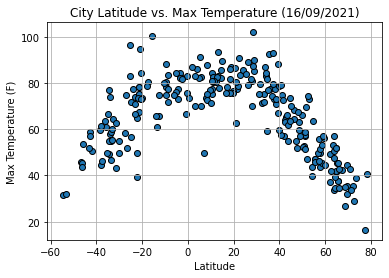

In [12]:
# Create a scatter plot based on new dataframe above (weather data frame )
plt.scatter(weather_dict['Lat'], weather_dict['Max Temp'], marker = "o", edgecolor='black')

# Add labels and title to plot
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title('City Latitude vs. Max Temperature (' + curr_date +')')
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.savefig("Data/City Latitude vs. Max Temperature.png")

# Display plot
plt.show()

City Latitude vs. Max Temperature plot shows the relationship between latitude and temperature. 
It shows that the closer you are to the equator (latitude 0), the temperature becomes more and hotter.

## Latitude vs. Humidity Plot

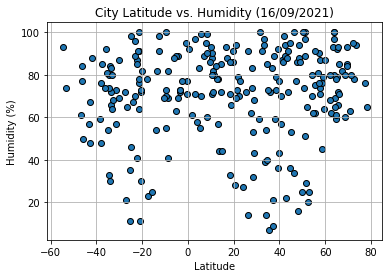

In [13]:
# Create a scatter plot based on new dataframe above (weather data frame )
plt.scatter(weather_dict['Lat'], weather_dict['Humidity'], marker = "o", edgecolor='black')

# Add labels and title to plot
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title('City Latitude vs. Humidity (' + curr_date +')')
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.savefig("Data/City Latitude vs. Humidity.png")

# Display plot
plt.show()

City Latitude vs. Humidity plot shows the relationship between latitude and humidity. 
It shows that the humidity is more consistent with higher latitudes.

## Latitude vs. Cloudiness Plot

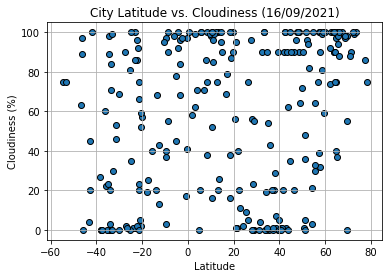

In [14]:
# Create a scatter plot based on new dataframe above (weather data frame )
plt.scatter(weather_dict['Lat'], weather_dict['Cloudiness'], marker = "o", edgecolor='black')

# Add labels and title to plot
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title('City Latitude vs. Cloudiness (' + curr_date +')')
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.savefig("Data/City Latitude vs. Cloudiness.png")

# Display plot
plt.show()

City Latitude vs. Cloudiness plot shows that there's a random relationship between latitude and cloudiness.

## Latitude vs. Wind Speed Plot

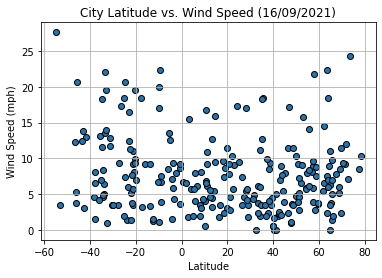

In [15]:
# Create a scatter plot based on new dataframe above (weather data frame )
plt.scatter(weather_dict['Lat'], weather_dict['Wind Speed'], marker = "o", edgecolor='black')

# Add labels and title to plot
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title('City Latitude vs. Wind Speed (' + curr_date +')')
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.savefig("Data/City Latitude vs. Wind Speed.png")

# Display plot
plt.show()


City Latitude vs. Wind Speed plot shows the relationship between latitude and wind speed. 
The wind speeds are greater as you move farther away from equator (latitude 0). 

## Linear Regression

In [16]:
# Create Northern and Southern Hemisphere DataFrames
above_equator = weather_dict['Lat'] >= 0
northern_hemisphere = weather_dict[above_equator]
southern_hemisphere = weather_dict[~above_equator]

In [17]:
# Define plotting function to input X axis and Y axis.

def plot_Linear_Regression(xdata,ydata,xlabel,ylabel):
    (slope, intercept, rvalue, pvalue, stderr) = stats.linregress(xdata, ydata)
    print(f"The r-value is: {rvalue}")
    regress_values = xdata * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(xdata,ydata)
    plt.plot(xdata,regress_values,"r-")
    plt.annotate(line_eq,(10,20),fontsize=12,color="red")
    plt.grid()
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: -0.8305860104636884


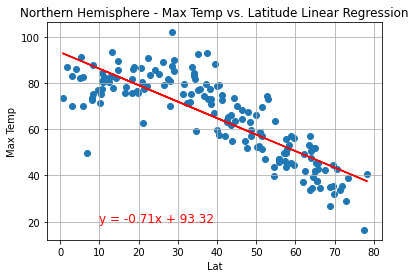

In [18]:
# Northern Hemisphere - Max Temp vs. Latitude Linear Regression
xlabel = "Lat"
ylabel = "Max Temp"
plt.title('Northern Hemisphere - Max Temp vs. Latitude Linear Regression')
plt.savefig("Data/Northern Hemisphere - Max Temp vs. Latitude Linear Regression.png")
plot_Linear_Regression(northern_hemisphere[xlabel],northern_hemisphere[ylabel],xlabel,ylabel)

Northern Hemisphere - Max Temp vs. Latitude Linear Regression shows that there is negative linear relationship between Max Temp and Latitude in the Northern Hemisphere. When latitude increases, temperature decreases hence a negative linear relationship exists.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.7245908564422475


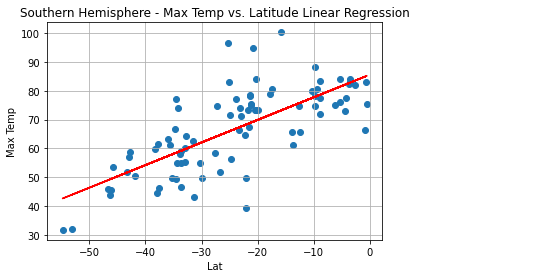

In [19]:
# Southern Hemisphere - Max Temp vs. Latitude Linear Regression
xlabel = "Lat"
ylabel = "Max Temp"
plt.title('Southern Hemisphere - Max Temp vs. Latitude Linear Regression')
plt.savefig("Data/Southern Hemisphere - Max Temp vs. Latitude Linear Regression.png")
plot_Linear_Regression(southern_hemisphere[xlabel],southern_hemisphere[ylabel],xlabel,ylabel)

Southern Hemisphere - Max Temp vs. Latitude Linear Regression shows that there is positive linear relationship between Max Temp and Latitude in the Southern Hemisphere. When latitude increases, temperature also increases hence a positive linear relationship exists.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.032325853052815795


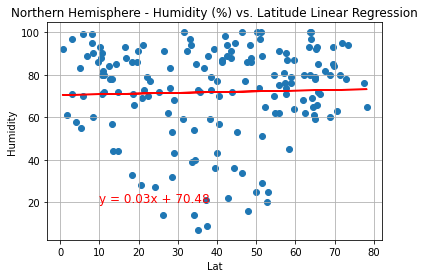

In [20]:
# Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression
xlabel = "Lat"
ylabel = "Humidity"
plt.title('Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression')
plt.savefig("Data/Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression.png")
plot_Linear_Regression(northern_hemisphere[xlabel],northern_hemisphere[ylabel],xlabel,ylabel)

Northern Hemisphere - Humidity vs. Latitude Linear Regression plot shows that when latitude increases, Humidity slightly increases hence not a very strong linear relationship exists.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.09108493431689328


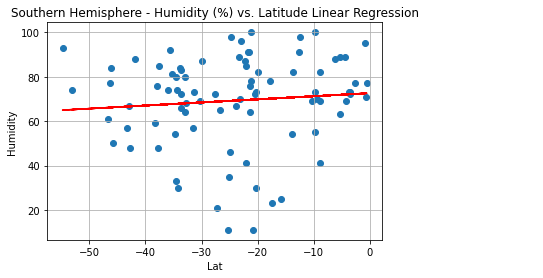

In [21]:
# Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression
xlabel = "Lat"
ylabel = "Humidity"
plt.title('Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression')
plt.savefig("Data/Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression.png")
plot_Linear_Regression(southern_hemisphere[xlabel],southern_hemisphere[ylabel],xlabel,ylabel)

Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression shows that as you move away from the equator (latitude 0) humidity increases.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.15670260165629374


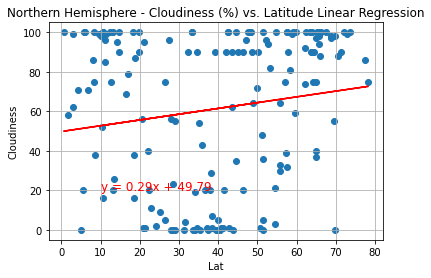

In [22]:
# Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression
xlabel = "Lat"
ylabel = "Cloudiness"
plt.title('Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')
plt.savefig("Data/Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png")
plot_Linear_Regression(northern_hemisphere[xlabel],northern_hemisphere[ylabel],xlabel,ylabel)

Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression plot shows that there is a positive correlation between Cloudiness and Latitude in the Northern Hemisphere.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.21306320622011604


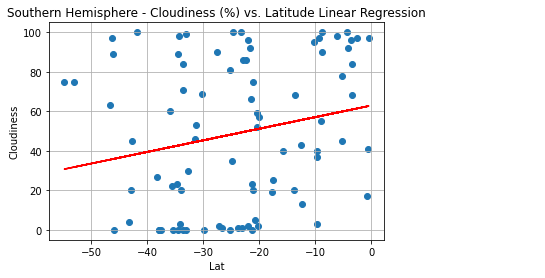

In [23]:
# Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression
xlabel = "Lat"
ylabel = "Cloudiness"
plt.title('Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')
plt.savefig("Data/Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png")
plot_Linear_Regression(southern_hemisphere[xlabel],southern_hemisphere[ylabel],xlabel,ylabel)

Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression plot shows that there is a slight negative correlation between Cloudiness and Latitude in the Southern Hemisphere.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.12295817429734042


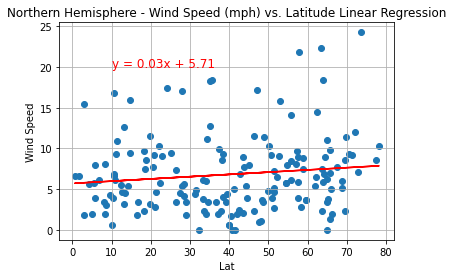

In [24]:
# Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression
xlabel = "Lat"
ylabel = "Wind Speed"
plt.title('Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')
plt.savefig("Data/Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression.png")
plot_Linear_Regression(northern_hemisphere[xlabel],northern_hemisphere[ylabel],xlabel,ylabel)

Northern Hemisphere - Wind Speed vs. Latitude Linear Regression plot shows that there is a slight positive correlation between Wind Speed and Latitude in the Northern Hemisphere.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.14504209381051267


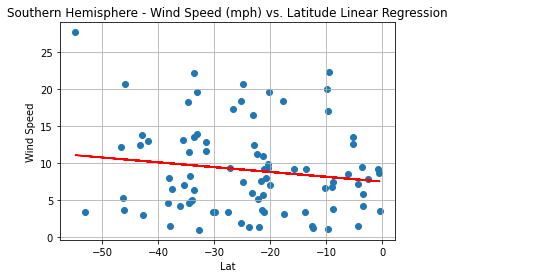

In [25]:
# Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression
xlabel = "Lat"
ylabel = "Wind Speed"
plt.title('Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')
plt.savefig("Data/Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression.png")
plot_Linear_Regression(southern_hemisphere[xlabel],southern_hemisphere[ylabel],xlabel,ylabel)

Southern Hemisphere - Wind Speed vs. Latitude Linear Regression plot shows that there is a slight negative correlation between Wind Speed and Latitude in the Southern Hemisphere.